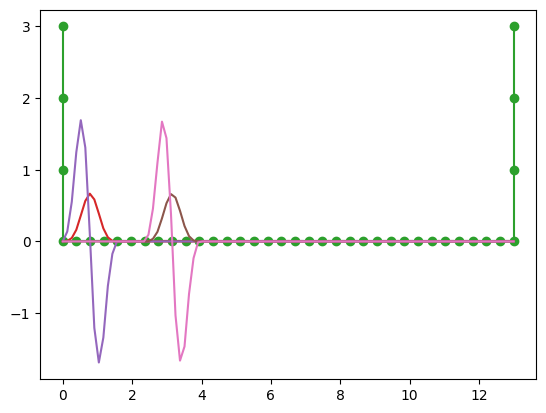

In [1]:

    
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0, 2*2.0*np.pi, 1000)
y = np.sin(x)


grid_bin = np.fromfile("../out/grid.bin", dtype=np.float64)
plt.plot(grid_bin, np.zeros(len(grid_bin)))
grid = np.loadtxt("../out/grid.dat")
plt.plot(grid, np.zeros(len(grid)), linestyle='--')
knots = np.loadtxt("../out/knotpoints.dat")
order_k = 4
knots_y = np.zeros(len(knots))
y_shift = order_k-1
for i in range(order_k-1):
    knots_y[i] = y_shift
    y_shift = y_shift - 1

y_shift = order_k-1
for i in range(order_k-1):
    knots_y[len(knots)-1-i] = y_shift
    y_shift = y_shift - 1
    
plt.plot(knots, knots_y, marker='o')


#bspline0 = np.loadtxt("../out/bspline0.dat")
#plt.plot(grid, bspline0)
#bspline1 = np.loadtxt("../out/bspline1.dat")
#plt.plot(grid, bspline1)
#bspline2 = np.loadtxt("../out/bspline2.dat")
#plt.plot(grid, bspline2)
bspline3 = np.loadtxt("../out/bspline3.dat")
plt.plot(grid, bspline3)
dBspline3 = np.loadtxt("../out/dBspline3.dat")
plt.plot(grid, dBspline3)
bspline9 = np.loadtxt("../out/bspline9.dat")
plt.plot(grid, bspline9)
dBspline9 = np.loadtxt("../out/dBspline9.dat")
plt.plot(grid, dBspline9)





(100, 36)
(40, 36)


array([[1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 4.066601e-29,
        9.018427e-15, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 4.066601e-29,
        9.018427e-15, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 4.066601e-29,
        9.018427e-15, 1.000000e+00]])

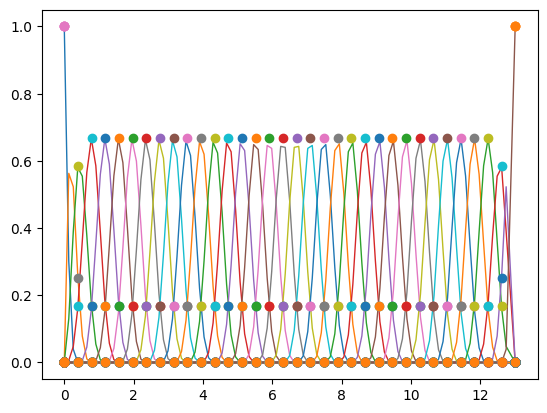

In [2]:
def plot_bsplines(x_axis, filename, mark=None, linewidth=1):
    bsplines = np.loadtxt(filename, skiprows=1)
    bspl_shape = bsplines.shape
    print(bspl_shape)
    num_rows = bspl_shape[0]
    num_cols = bspl_shape[1]
    for i in range(num_cols):
        bspl = bsplines[:, i]
        plt.plot(x_axis, bspl, marker=mark, linewidth=linewidth)

    return bsplines

plot_bsplines(grid, "../out/bsplines_grid.dat")
plot_bsplines(knots, "../out/bsplines_knots.dat", 'o', 0)

(100, 36)
(40, 36)


array([[-7.615385e+00,  7.615385e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [-7.615385e+00,  7.615385e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [-7.615385e+00,  7.615385e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       ...,
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ..., -3.433940e-14,
        -7.615385e+00,  7.615385e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ..., -3.433940e-14,
        -7.615385e+00,  7.615385e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ..., -3.433940e-14,
        -7.615385e+00,  7.615385e+00]])

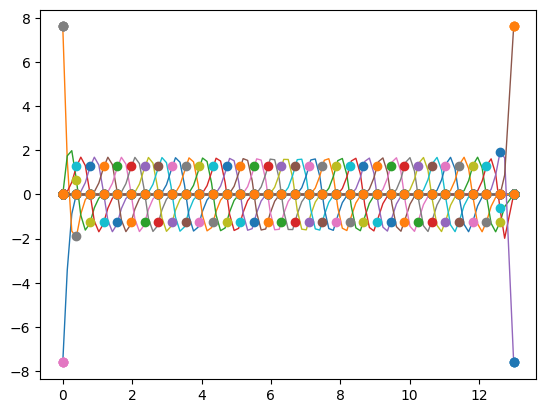

In [3]:
def plot_bsplines(x_axis, filename, mark=None, linewidth=1):
    bsplines = np.loadtxt(filename, skiprows=1)
    bspl_shape = bsplines.shape
    print(bspl_shape)
    num_rows = bspl_shape[0]
    num_cols = bspl_shape[1]
    for i in range(num_cols):
        bspl = bsplines[:, i]
        plt.plot(x_axis, bspl, marker=mark, linewidth=linewidth)

    return bsplines;

plot_bsplines(grid, "../out/dBsplines_grid.dat")
plot_bsplines(knots, "../out/dBsplines_knots.dat", 'o', 0)

0.7295584424494733


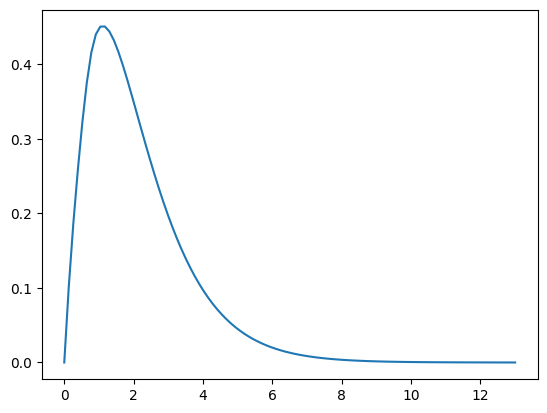

In [4]:
bsplines = np.loadtxt("../out/bsplines_grid.dat", skiprows=1)
coeffs = np.loadtxt("../out/ground_state_coeffs.dat")

radialwf = np.sum(coeffs*bsplines[:,1:-1], axis=1)

plt.plot(grid, radialwf)
print(np.sum(radialwf)/(grid[len(grid)-1]-grid[0]))